# Цель исследования

Изучить датасет, выявить интересные закономерности на рынке игровой индустрии для прогнозирования продаж и рекламных кампаний.

## Ход исследования:
  - Первичное ознакомление с данными 
  - Обработка данных:
     - исключение/обработка дубликатов и пропусков
     - корректировка типов данных
     - отсечение выбивающихся значений 
  - Изучение данных для выявления интересных фактов и закономерностей.

# Знакомство с данными 

In [56]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st
pd.options.display.float_format = '{:.3f}'.format
pd.set_option('mode.chained_assignment', None)

In [57]:
df = pd.read_csv('https://code.s3.yandex.net//datasets/games.csv')
display (df.head(10))
df.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.000,Sports,41.360,28.960,3.770,8.450,76.000,8,E
1,Super Mario Bros.,NES,1985.000,Platform,29.080,3.580,6.810,0.770,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.000,Racing,15.680,12.760,3.790,3.290,82.000,8.3,E
3,Wii Sports Resort,Wii,2009.000,Sports,15.610,10.930,3.280,2.950,80.000,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.000,Role-Playing,11.270,8.890,10.220,1.000,NaN,NaN,NaN
5,Tetris,GB,1989.000,Puzzle,23.200,2.260,4.220,0.580,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.000,Platform,11.280,9.140,6.500,2.880,89.000,8.5,E
7,Wii Play,Wii,2006.000,Misc,13.960,9.180,2.930,2.840,58.000,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.000,Platform,14.440,6.940,4.700,2.240,87.000,8.4,E
9,Duck Hunt,NES,1984.000,Shooter,26.930,0.630,0.280,0.470,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


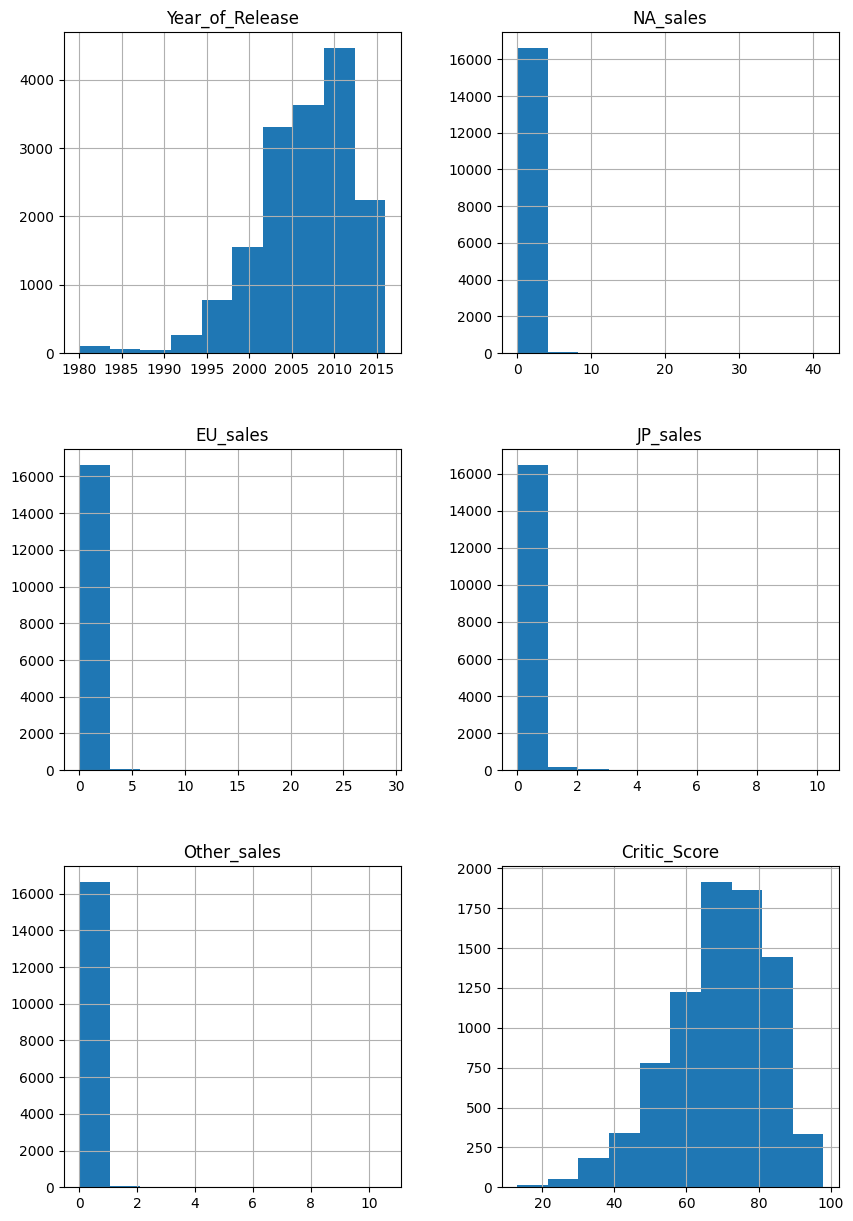

In [58]:
df.hist(figsize=(10, 15))
plt.show()

При знакомстве с данными мы видим, что они нуждаются в предобработке: пропуски, названия столбцов, неудобные для работы типы данных и т.д. Исправим это и разберем их причины далее.

# Предобработка данных 

## Обработка дубликатов 

In [59]:
display(df[df.duplicated()])

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating


**Явных дубликатов не обнаружено.**

## Переименование столбцов 

In [60]:
df.columns = df.columns.str.lower()

**Теперь названия столбцов соответствуют "змеиному" регистру - так с ним удобнее работать.**

## Обработка пропусков 

### Наименование

In [61]:
display(df[df['name'].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.000,NaN,1.780,0.530,0.000,0.080,NaN,NaN,NaN
14244,NaN,GEN,1993.000,NaN,0.000,0.000,0.030,0.000,NaN,NaN,NaN


**В столбце наименования есть всего два пропуска - оба на платформе GEN, без указания жанра, оценок и рейтинга. Скорее всего эти пропуски вызваны отсутвием данных, вероятно - в силу года выпуска. Так же может быть ошибка в выгрузке. В любом случае, эти две сроки достаточно неиформативны. Посему - избавляемся от них.**

In [62]:
df = df.dropna(subset=['name'])

### Год выпуска

In [63]:
display(df[df['year_of_release'].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.260,0.260,0.010,0.710,94.000,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.590,2.360,0.040,0.510,84.000,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.800,0.970,0.000,0.290,74.000,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.570,1.020,0.000,0.410,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.360,0.140,0.000,0.030,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.010,0.000,0.000,0.000,43.000,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.010,0.000,0.000,0.000,69.000,6.5,T
16448,Inversion,PC,NaN,Shooter,0.010,0.000,0.000,0.000,59.000,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.010,0.000,0.000,0.000,NaN,NaN,NaN


**В этом столбце пропусков значительно больше, чем в предыдущем. Мы можем заменить часть пропусков по соответствию имени - обычно игры выходят на разных платформах почти одновременно.**

In [ ]:
for name in df['name'].unique():
    median = df.loc[df['name'] == name,'year_of_release'].median()
    df.loc[(df['year_of_release'].isna()) & (df['name'] == name),'year_of_release'] = median

In [65]:
display(df[df['year_of_release'].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.570,1.020,0.000,0.410,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.930,0.330,0.000,0.210,92.000,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.150,0.180,0.000,0.070,73.000,tbd,E
805,Rock Band,Wii,NaN,Misc,1.330,0.560,0.000,0.200,80.000,6.3,T
1142,Rock Band,PS3,NaN,Misc,0.990,0.410,0.000,0.220,92.000,8.4,T
...,...,...,...,...,...,...,...,...,...,...,...
16277,Homeworld Remastered Collection,PC,NaN,Strategy,0.000,0.010,0.000,0.000,86.000,8.2,E10+
16288,Shorts,DS,NaN,Platform,0.010,0.000,0.000,0.000,NaN,tbd,E10+
16348,Agarest Senki: Re-appearance,PS3,NaN,Role-Playing,0.000,0.000,0.010,0.000,NaN,NaN,NaN
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.010,0.000,0.000,0.000,NaN,NaN,NaN


**Часть пропусков мы смогли заполнить, однако не все. Оставшиеся пропуски составляют менее одного процента от датасета и заполнить их мы уже не можем. Решение очевидно - отсекаем.**

In [66]:
df = df.dropna(subset=['year_of_release'])

### Оценки и рейтинг

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  float64
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     8075 non-null   float64
 9   user_score       9934 non-null   object 
 10  rating           9868 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


**В последних трех столбцах много пропусков - от 40% до 51%.** Эти пропуски, скорее всего, появились по причине того, что оценки собирали из определенных источников, в которых оценивались далеко не все игры. 

Мы не можем заполнить пропущенные значения, так как не медианное, не среднее значение даже по выборкам не смогут дать нам объективный результат. 
Удалить такой большой объем данных мы тоже не можем - это может повлиять на точность исследований, к тому же другие данные  в строке - вполне доступны для анализа. **Таким образом, мы ничего не можем сделать с пропусками в этих данных, кроме как учесть их наличие в последующей работе.**

**Так же мы видим значения "tbd" в столбце user_score, что означает, что игра только ожидает оценки. Мы никак не можем оценить этот параметр, посему, для нас он равен пропуску. Заменяем на NaN.**

In [68]:
df['user_score'] = df['user_score'].replace('tbd', np.NaN)

## Изменение типов данных

**Преобразуем данные для удобства дальнейшей работы:**
 - В year_of_release видим вещественный тип, тогда как на самом деле значения цельночисленные.   
 - В столбце user_score установлен тип object, так как ранее столбец содержал в себе как вещественные числа, так и строки (tbd, который мы удалили ранее). Теперь же мы можем спокойно установить вещественный тип. 

In [69]:
df['year_of_release'] = df['year_of_release'].astype('int')
df['user_score'] = df['user_score'].astype('float')

## Дополнительные данные 

Добавим в датафрейм столбец с суммарными продажами каждой игре во всех регионах, чтобы упростить работу с этим параметром в дальнейшей работе:

In [70]:
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

**Познакомимся с нашим обновленным датафреймом**

In [71]:
display(df)
df.info()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.360,28.960,3.770,8.450,76.000,8.000,E,82.540
1,Super Mario Bros.,NES,1985,Platform,29.080,3.580,6.810,0.770,NaN,NaN,NaN,40.240
2,Mario Kart Wii,Wii,2008,Racing,15.680,12.760,3.790,3.290,82.000,8.300,E,35.520
3,Wii Sports Resort,Wii,2009,Sports,15.610,10.930,3.280,2.950,80.000,8.000,E,32.770
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.270,8.890,10.220,1.000,NaN,NaN,NaN,31.380
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.000,0.000,0.010,0.000,NaN,NaN,NaN,0.010
16711,LMA Manager 2007,X360,2006,Sports,0.000,0.010,0.000,0.000,NaN,NaN,NaN,0.010
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.000,0.000,0.010,0.000,NaN,NaN,NaN,0.010
16713,Spirits & Spells,GBA,2003,Platform,0.010,0.000,0.000,0.000,NaN,NaN,NaN,0.010


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  int64  
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     8075 non-null   float64
 9   user_score       7540 non-null   float64
 10  rating           9868 non-null   object 
 11  total_sales      16567 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


# Исследовательский анализ данных

## Годы выпуска игр

На этом этапе подробнее ознакомимся с распределением входа игр по годам и решим, какой временной промежуток для нас актуален.

Для начала, постоим гистограмму распределения:

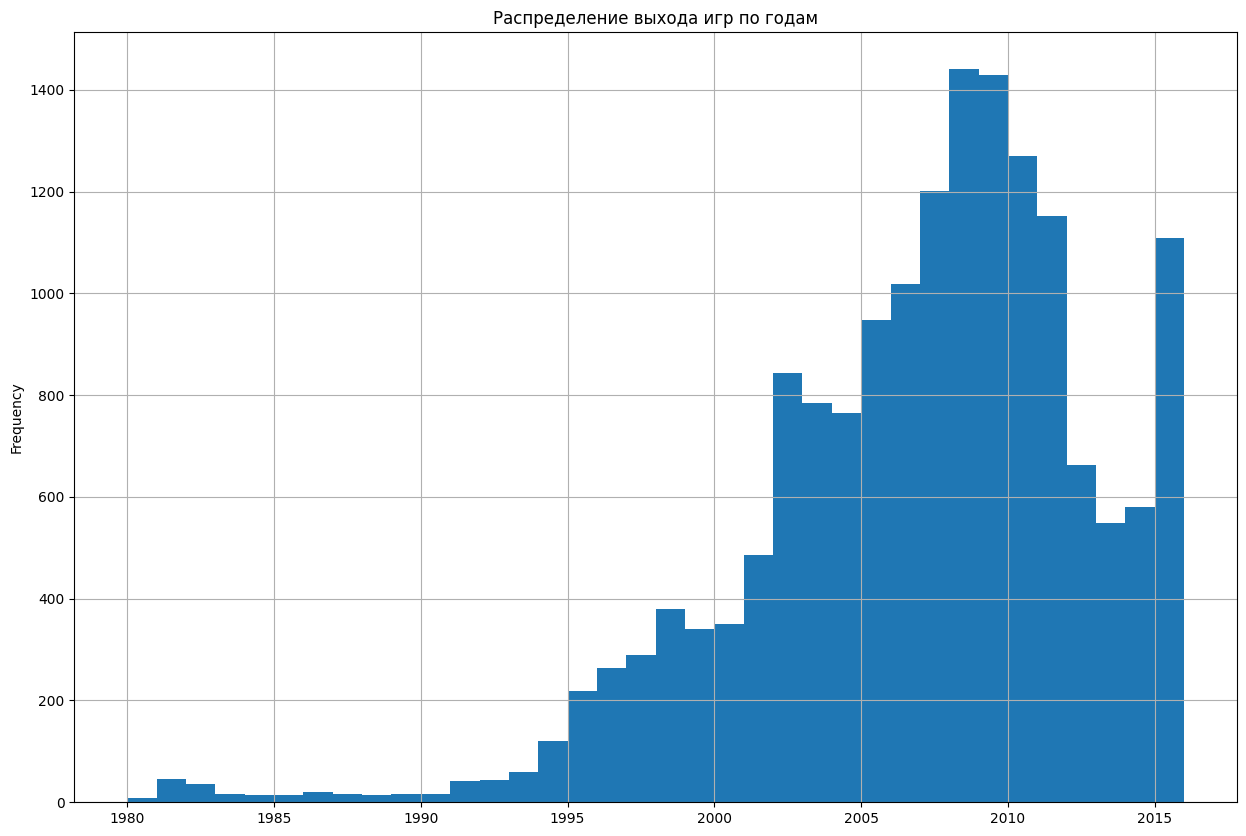

In [72]:
df['year_of_release'].plot(kind='hist', grid=True, figsize=(15, 10), bins=36)
plt.title('Распределение выхода игр по годам')
plt.show()

По графику мы видим, что:
  - Плавный рост количества игр в год начался с 1995 (вероятно, появление PC) и значительно разогнался с 2001. 
  - Пик выпуска игр приходится на 2006 - 2011 - более 1000 игр в год.
  - Но уже в 2012 их количество резко снизилось до менее 700 в год. 
  - Так было вплоть до 2016, в который вышло более 1100 игр. 
  
**И все же, данные за какой промеуток будут актуальны для анализа? По графику мы видим, что активная жизнь индустрии началась с 1995. Посему, отбросим данные за 1980 - 1994.**

In [73]:
df = df.query('year_of_release > 1994')

## Анализ платформ

### Топ-6 платформ

Проверим, как распределяются продажи по платформам:

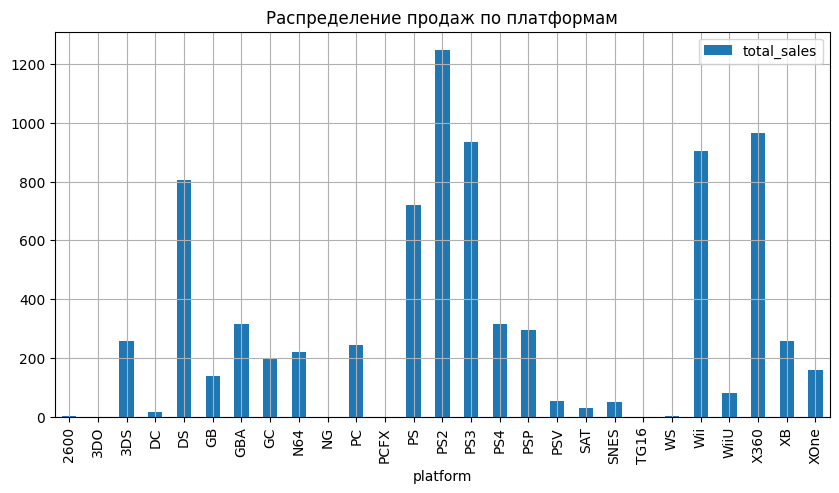

In [74]:
pivot_platform = df.pivot_table(index='platform', values='total_sales', aggfunc='sum').reset_index()
pivot_platform.plot(
    x='platform', y='total_sales',
    kind='bar', figsize=(10, 5), grid=True,
    title='Распределение продаж по платформам') 
plt.show()

По графику мы видим явных лидеров: PS с первого по третье поколение, Нинтендо DS и Wii, а так же Xbox 360 . 
Выделим данные популярных платформ (свыше 500 тыс. продаж) в отдельный датасет:

In [75]:
top_platform = (
    pivot_platform.query('total_sales > 500')
    .sort_values(by='total_sales', ascending=False)
    .reset_index()
)
display (top_platform)

,index,platform,total_sales
0,13,PS2,1247.160
1,24,X360,966.610
2,14,PS3,935.190
3,22,Wii,903.310
4,4,DS,804.260
5,12,PS,721.550


**Проверим, как распределялись продажи на топовые платформы по годам:**

### Продажи на PS2

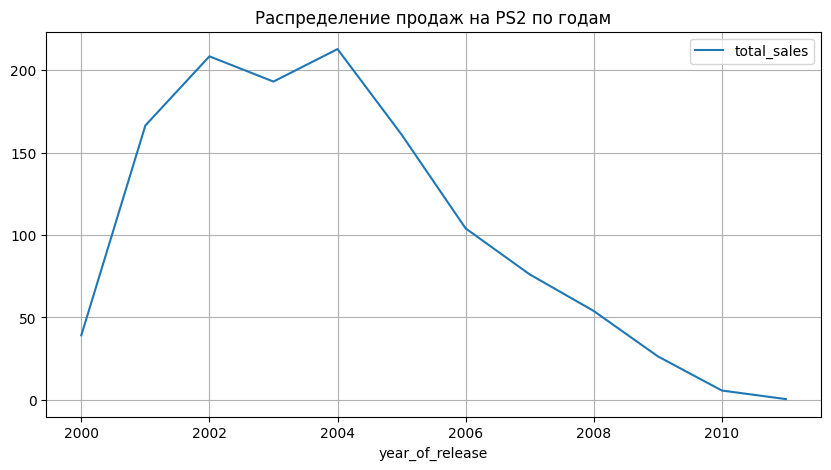

In [76]:
PS2_df = df.query('platform == "PS2"') #датасет по платформе
pivot_ps_2 = PS2_df.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').reset_index()
pivot_ps_2.plot(
    x='year_of_release', y='total_sales',
    kind='line', figsize=(10, 5), grid=True,
    title='Распределение продаж на PS2 по годам') 
plt.show()

По графику видно, что восхождение PS2 началось в 2000 и с 2001 по 2005 она удерживала достаточно высокие позиции. Однако уже к 2006 продажи сократились вдвое, а в 2011 совсем приблизились к нулю.

### Продажи на Xbox360

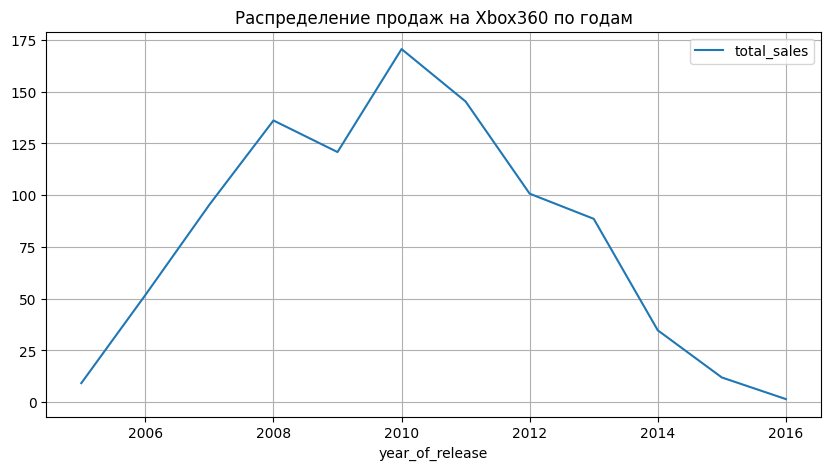

In [77]:
xbox360_df = df.query('platform == "X360"') #датасет по платформе
pivot_xbox360 = xbox360_df.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').reset_index()
pivot_xbox360.plot(
    x='year_of_release', y='total_sales',
    kind='line', figsize=(10, 5), grid=True,
    title='Распределение продаж на Xbox360 по годам') 
plt.show()

Xbox360 появился на рынке в 2005, а первую сотню продаж сделал в 2007. Самый пик пополуярности пришелся на 2010, а последнюю сотню Xbox360 осилил в 2012.

### Продажи на PS3 	

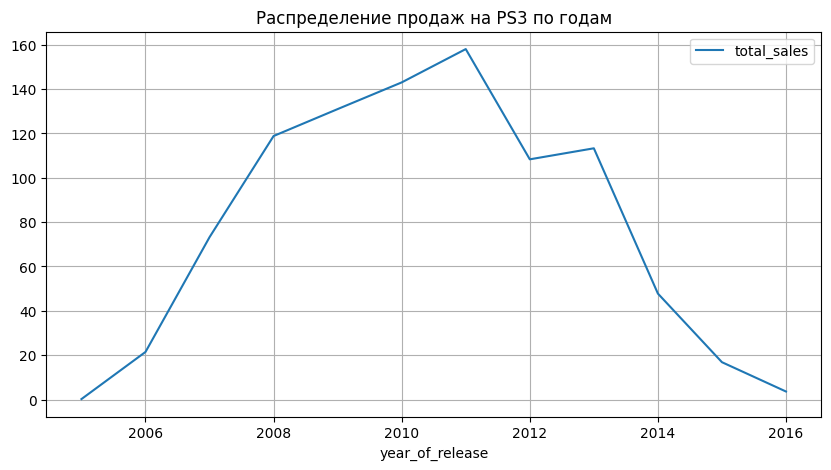

In [78]:
PS3_df = df.query('platform == "PS3"') #датасет по платформе
pivot_ps_3 = PS3_df.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').reset_index()
pivot_ps_3.plot(
    x='year_of_release', y='total_sales',
    kind='line', figsize=(10, 5), grid=True,
    title='Распределение продаж на PS3 по годам') 
plt.show()

PS3 очевидно пришел на смену своему старшему брату - когда у PS2 продажи убывают, у PS3 прибывают. Пик продаж на эту приставку (более 100 млн. продаж) приходится на 2007 - 2013.

### Продажи на Nintendo Wii

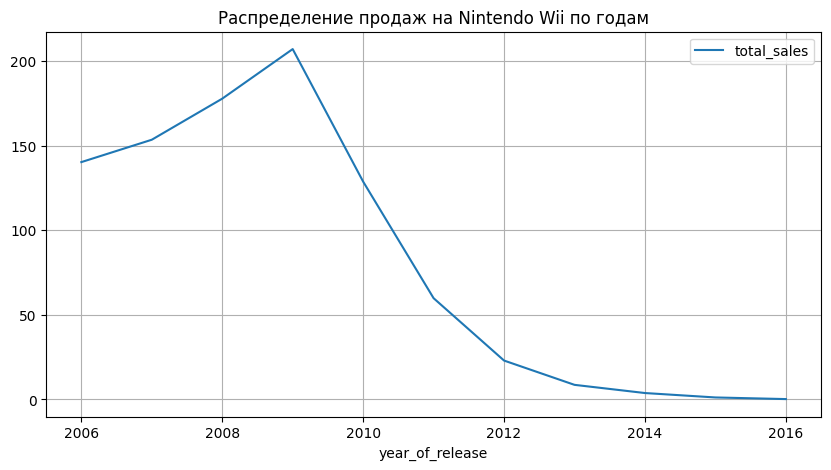

In [79]:
wii_df = df.query('platform == "Wii"') #датасет по платформе
pivot_wii = wii_df.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').reset_index()
pivot_wii.plot(
    x='year_of_release', y='total_sales',
    kind='line', figsize=(10, 5), grid=True,
    title='Распределение продаж на Nintendo Wii по годам') 
plt.show()

У продаж на Nintendo Wii настоящий трамплин! С самого выпуска приставки в 2006 продажи составляли более 130 млн. и не прекращали расти вплоть по 2009. Там, достигнув отметки в 200 млн., поползли вниз.

### Продажи на Nintendo DS

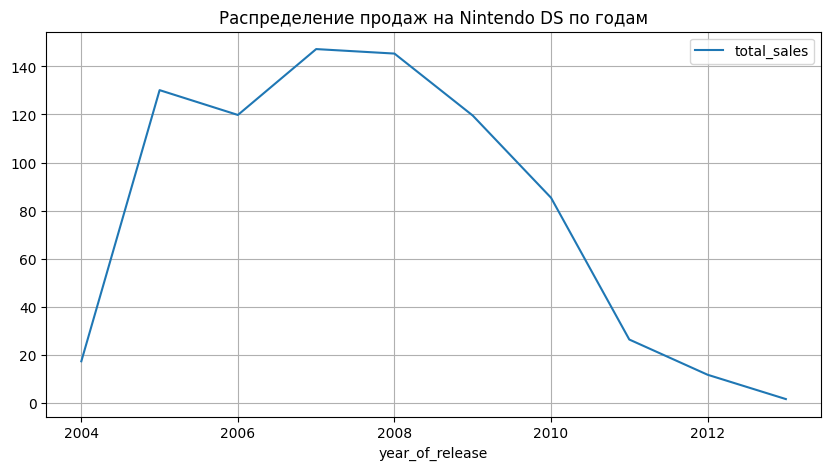

In [80]:
ds_df = df.query('platform == "DS"') #датасет по платформе
pivot_ds = ds_df.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').reset_index()
pivot_ds.plot(
    x='year_of_release', y='total_sales',
    kind='line', figsize=(10, 5), grid=True,
    title='Распределение продаж на Nintendo DS по годам') 
plt.show()

Продажи на Nintendo DS были не столь внушительными, как на Nintendo Wii, все-таки другая специфика. Однако, свои первые 100 млн. она сделала в 2005 и стойко держала заданную планку до 2009. Пик продаж (более 145 млн.) пришелся на 2007.

### Продажи на PS

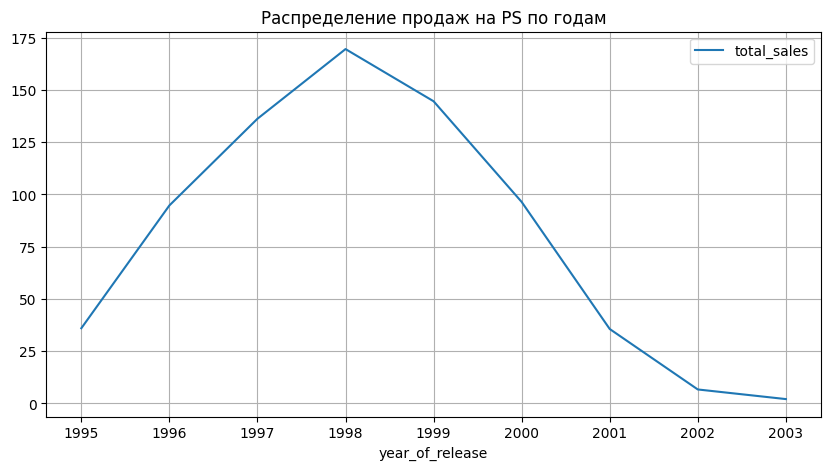

In [81]:
PS_df = df.query('platform == "PS"') #датасет по платформе
pivot_ps = PS_df.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').reset_index()
pivot_ps.plot(
    x='year_of_release', y='total_sales',
    kind='line', figsize=(10, 5), grid=True,
    title='Распределение продаж на PS по годам') 
plt.show()

Среди нашего топ-6 рейтинга, эта приставка самая старая. Пик ее продаж (около 160 млн.) пришелся на 1998. Первые 100 млн. были в далеком 1996, в последние в не менее далеком 2000.

### Средняя продолжительность жизни платформы

Чтобы узнать среднюю продолжительность жизни платформы, возьмем данные из предыдущего исследования о том, сколько лет продажи на платформу составляли более 100 млн.копий и найдем среднее:

In [82]:
print('Средняя продолжительность жизни платформы', ((5+5+6+4+4+4)/6))

Средняя продолжительность жизни платформы 4.666666666666667


## Актуальный период для анализа и прогнозов

Чтобы построить актуальный прогноз, есть смысл взять за актуальный период среднюю продолжительность жизни платформы, так как прогнозировать есть возможность только в этих рамках. Таким образом, грубо округляя, мы получаем актуальный период в 5 лет, а значит промежуток с 2011 по 2016. 

Приведем датасет к актуальному виду:

In [83]:
df = df.query('year_of_release > 2014').reset_index()

Познакомимся с новыми данными:

In [84]:
display(df)
df.info()

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.030,5.860,0.360,2.380,NaN,NaN,NaN,14.630
1,77,FIFA 16,PS4,2015,Sports,1.120,6.120,0.060,1.280,82.000,4.300,E,8.580
2,87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.990,3.490,0.220,1.280,NaN,NaN,NaN,7.980
3,94,FIFA 17,PS4,2016,Sports,0.660,5.750,0.080,1.110,85.000,5.000,E,7.600
4,99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.590,2.110,0.010,0.680,NaN,NaN,NaN,7.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103,16699,The Longest 5 Minutes,PSV,2016,Action,0.000,0.000,0.010,0.000,NaN,NaN,NaN,0.010
1104,16703,Strawberry Nauts,PSV,2016,Adventure,0.000,0.000,0.010,0.000,NaN,NaN,NaN,0.010
1105,16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.000,0.000,0.010,0.000,NaN,NaN,NaN,0.010
1106,16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.000,0.000,0.010,0.000,NaN,NaN,NaN,0.010


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108 entries, 0 to 1107
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            1108 non-null   int64  
 1   name             1108 non-null   object 
 2   platform         1108 non-null   object 
 3   year_of_release  1108 non-null   int64  
 4   genre            1108 non-null   object 
 5   na_sales         1108 non-null   float64
 6   eu_sales         1108 non-null   float64
 7   jp_sales         1108 non-null   float64
 8   other_sales      1108 non-null   float64
 9   critic_score     457 non-null    float64
 10  user_score       559 non-null    float64
 11  rating           595 non-null    object 
 12  total_sales      1108 non-null   float64
dtypes: float64(7), int64(2), object(4)
memory usage: 112.7+ KB


## Прогноз потенциально прибыльных платформ

Для того, чтобы спрогнозировать дальнейшу динамику платформ, посмотрим, как они ведут себя в выделенном нами промежутке:

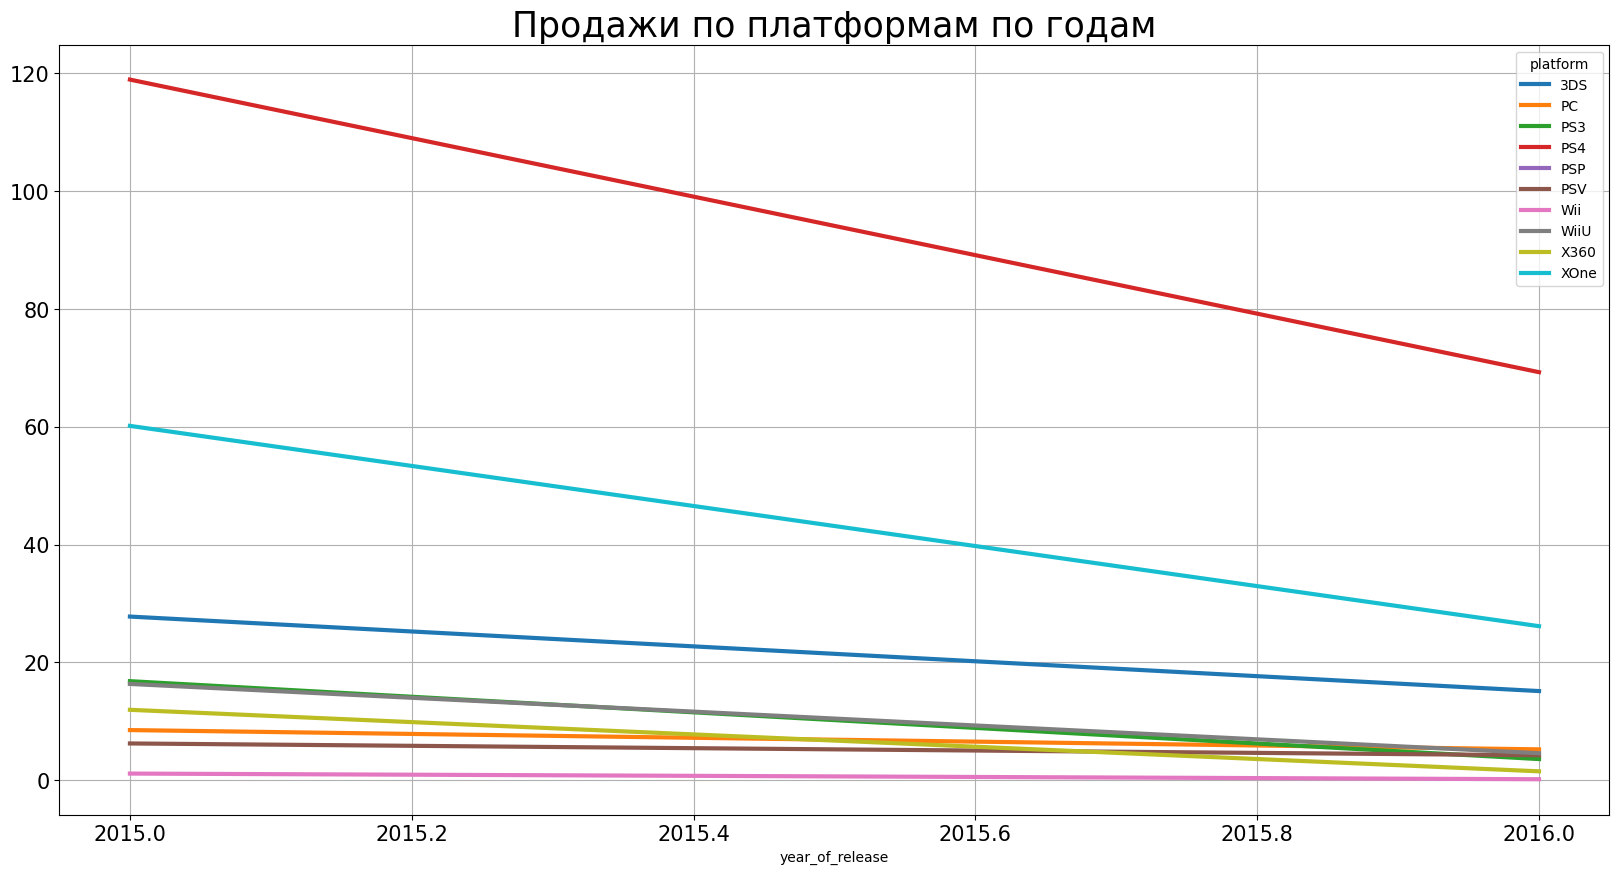

In [85]:
df.groupby(['platform','year_of_release'])['total_sales'].sum().unstack('platform').plot(
    figsize=(20,10), fontsize=15, linewidth=3, grid=True)
plt.title('Продажи по платформам по годам', fontsize=25)
plt.show()

Итак, по графику видим, что есть платформы (такие платформы как DS, PSP, PSV и другие), чьи продажи к концу актуального периода стремятся к нулю. Судя по графикам жизни платформ, они оттуда уже вряд-ди поднимутся. 3DS и X360 были на отличных позициях в начале периода, но уже к 2016 стремительно приближаются к нулю.

**И хотя мы видим, что все консоли просели за этот период, есть те, у кого еще есть шанс: PS4 и XboxOne. Они появились сравнительно недавно и будут актуальны в следующем году - об этом говорит как график, так и показатель средней продолжительности жизни платформы.**

## Анализ общих продаж по платформам

Для анализа общих продаж по платформам построим график "ящик с усами":

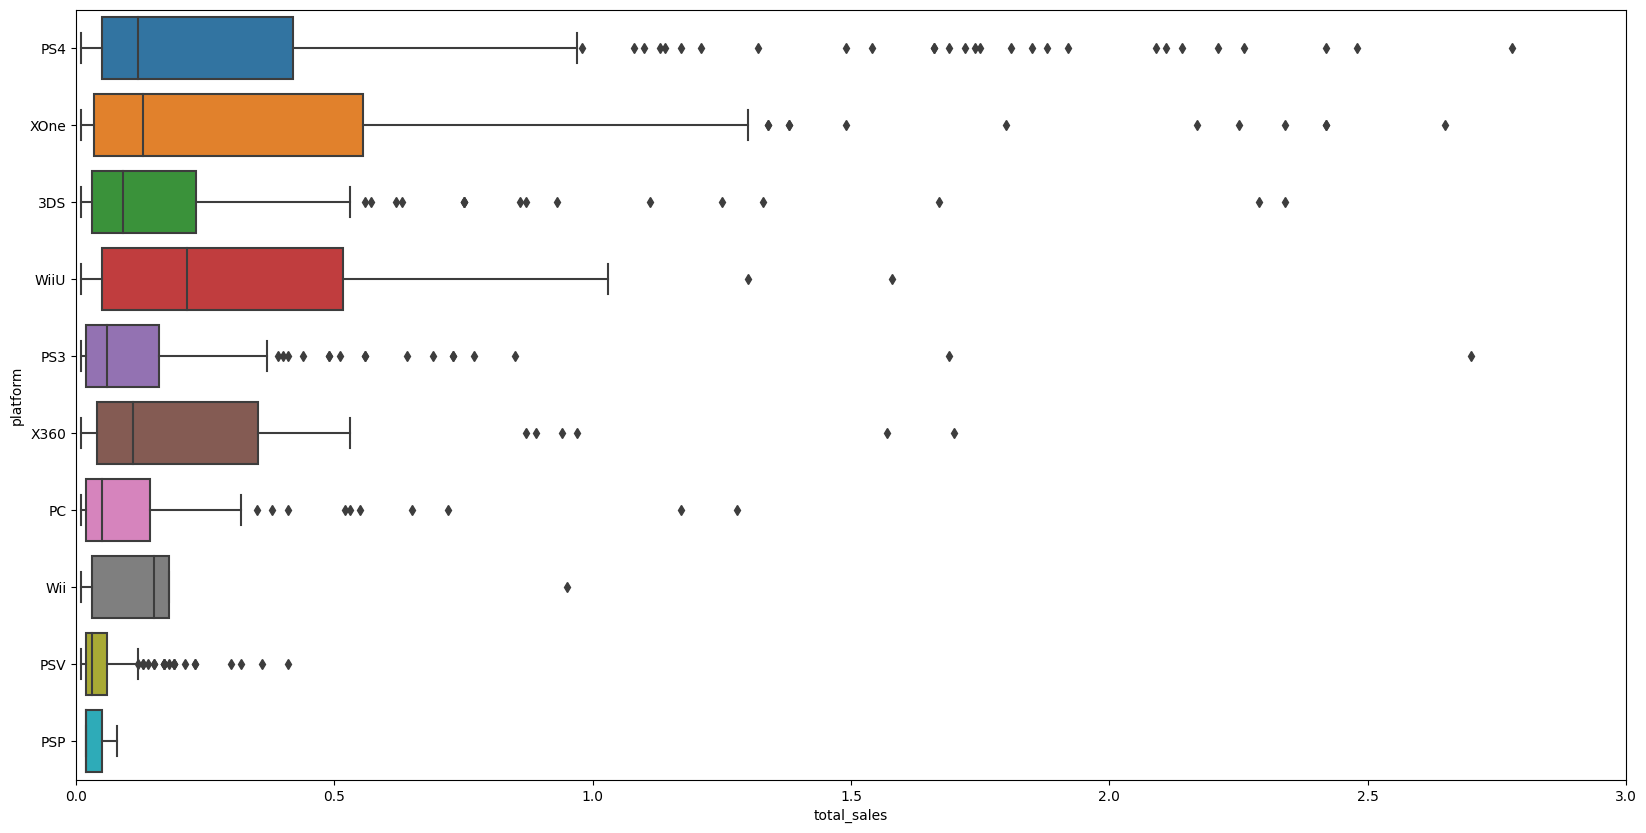

In [86]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df, x='total_sales', y='platform')
plt.xlim(0,3)
plt.show()

На графике мы видим, что медианное значение популярных платформ в актуальном периоде варьируется примерно от 100 до 200 тыс. продаж, что говорит о том, что в среднем именно столько копий каждой игры продается на платформу. 

Самые большие продажи за актуальный период у XOne, WiiU и PS4. Их верхние квартили превышают 500 тыс., а редкие значения превышают 2 млн. Можем предполагать из предыдущего исследования, что PS4 и XOne продолжат держать хорошие продажи. 

## Анализ зависимости продаж от отзывов

### Зависимость продаж от отзывов по одной платформе

Для того, чтобы понять тесноту взаимосвязи отзывов и продаж, рассмотрим корреляцию между оценками пользователей и рейтингом от критиков с продажам на одной из популярных в выбранном периоде платформе - XOne:

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


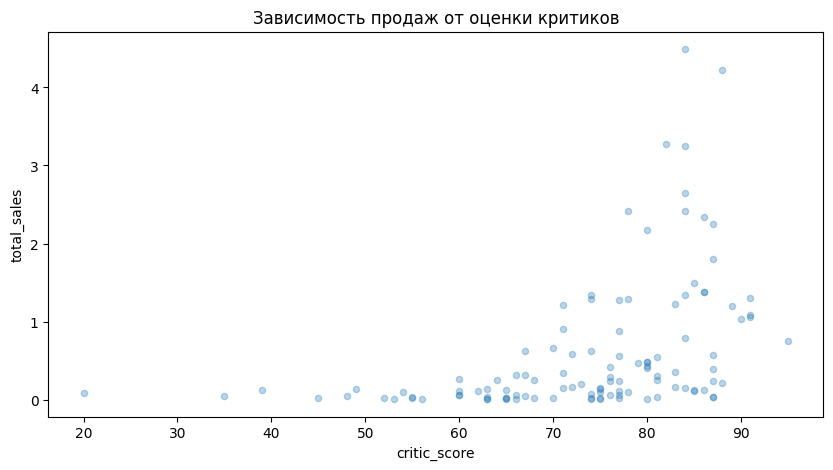

Корреляция 0.430888745821368


In [87]:
df_XOne = df.query('platform == "XOne"') #выделяем датасет по XOne
df_XOne.plot(
    y='total_sales', x='critic_score', 
    kind='scatter', alpha=0.3, figsize=(10,5),
    title='Зависимость продаж от оценки критиков'
) 
plt.show()
print('Корреляция', df_XOne['total_sales'].corr(df_XOne['critic_score']))

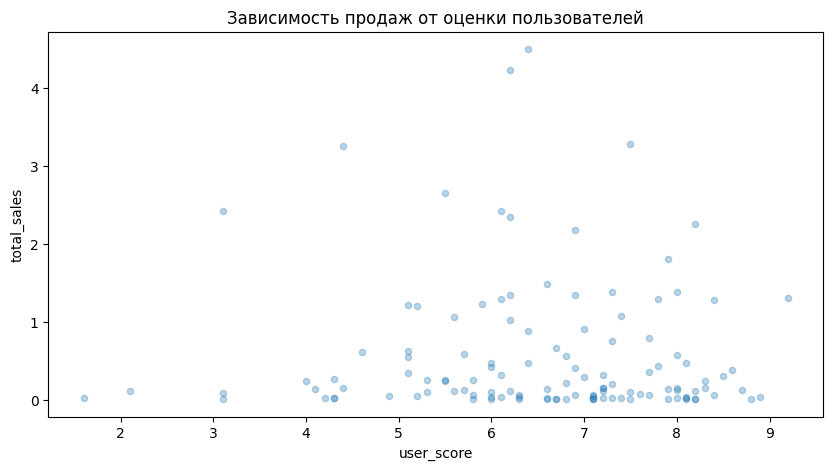

Корреляция -0.04146733387366271


In [88]:
df_XOne.plot(
    y='total_sales', x='user_score', 
    kind='scatter', alpha=0.3, figsize=(10,5),
    title='Зависимость продаж от оценки пользователей'
) 
plt.show()
print('Корреляция', df_XOne['total_sales'].corr(df_XOne['user_score']))

Графики и корреляция говорят нам, что совсем небольшая зависимость есть между продажами и отзывами критиков в самом начале продаж. Возможно, влияют отзывы, оставленные критиками еще до выхода игры на широкий рынок. Зависимости оценок пользователей от продаж не прослеживается.

**В целом, можно сказать, что линейная зависимость между оценками критиков и продажами слабая. Линейной зависимости между оценками пользователей и продажами не прослеживается.**

### Зависимость продаж от отзывов по популярным платформам

Проверим, как обстоят дела на других популярных платформах. Возможно, такое отсутвие взаимосвязи свойственно именно X360.

,total_sales,critic_score
total_sales,1.000,0.393
critic_score,0.393,1.000


/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


,total_sales,critic_score
total_sales,1.000,0.178
critic_score,0.178,1.000


/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


,total_sales,critic_score
total_sales,1.000,0.317
critic_score,0.317,1.000


/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


,total_sales,critic_score
total_sales,1.000,NaN
critic_score,NaN,NaN


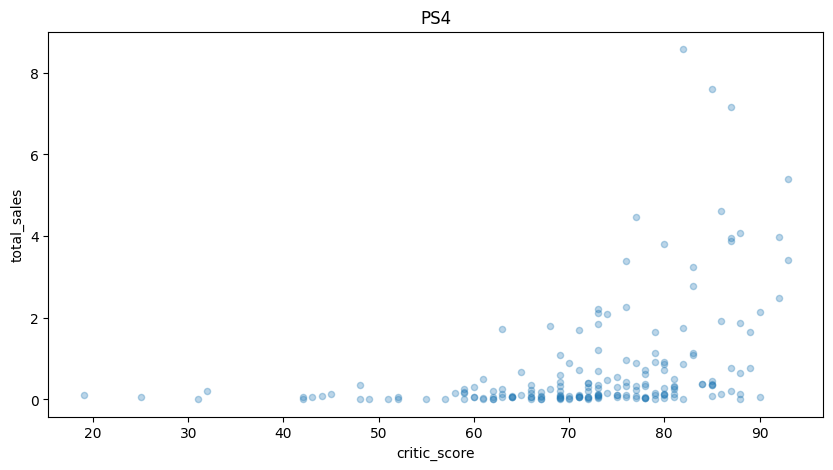

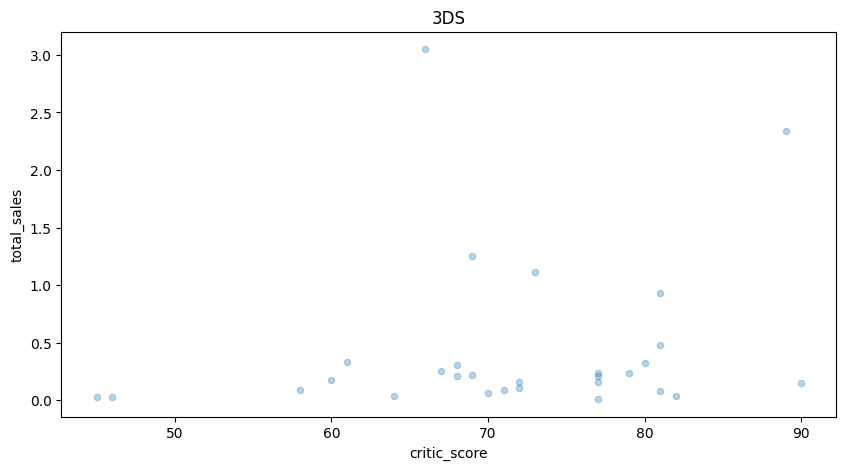

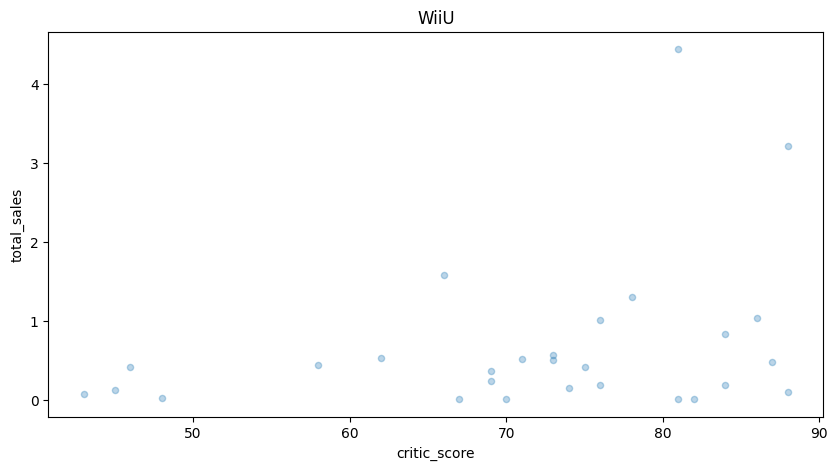

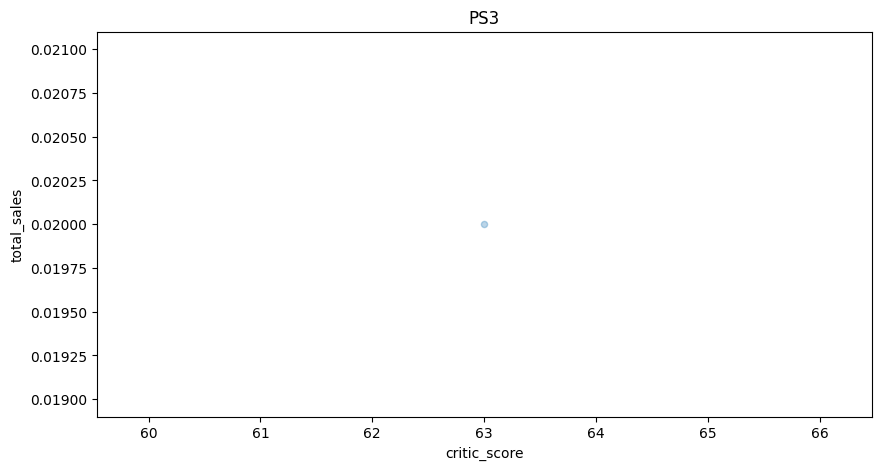

In [89]:
top_platforms = ['PS4', '3DS', 'WiiU', 'PS3']
for platform in top_platforms:
    df.query('platform == @platform').plot(y='total_sales', x='critic_score', 
                                           kind='scatter', title=platform, figsize=(10,5), alpha=0.3)
    display(df.query('platform == @platform')[['total_sales', 'critic_score']].corr())

**По графикам и корреляциям мы видим, что на топ-3 популярных платформах ситуация примерно одинаковая. Зависимость есть, однако совсем небольшая. Однако, на PS3 и WiiU корреляции с оценками критиков нет.**

Самая сильная взаимосвязь прослеживается с продажами Xone и оценками критиков, она составляет 0.43. Однако, даже такая корреляция является слабой.

## Анализ по жанрам

### Распределение игр по жанрам 

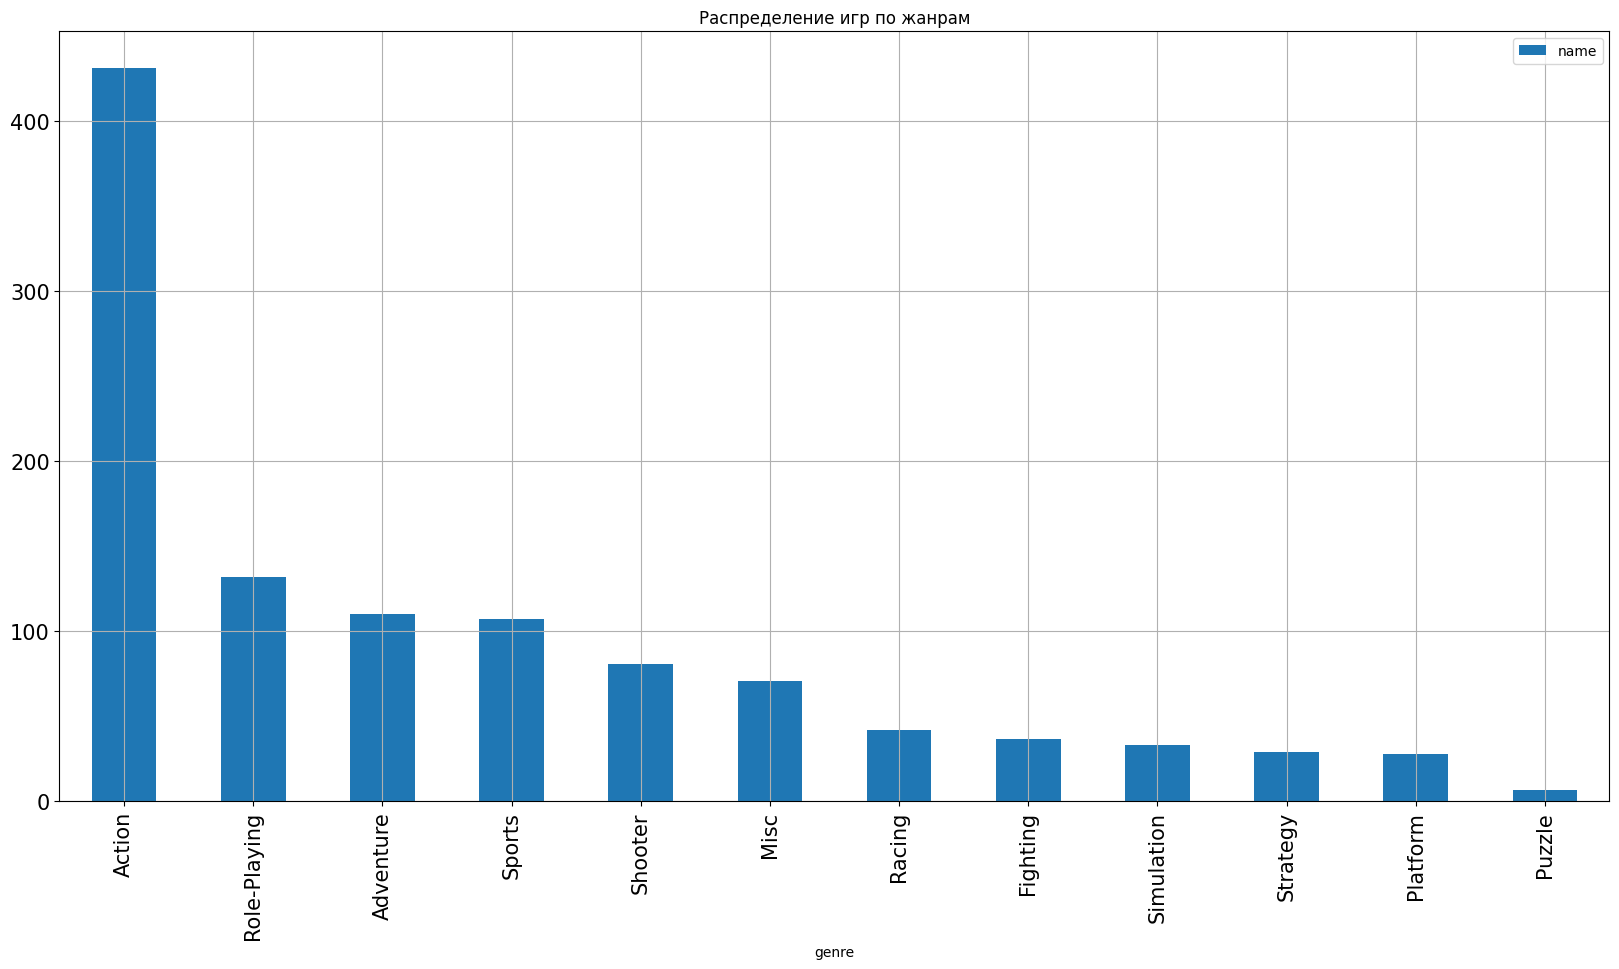

In [90]:
pivot_genre = (
    df
    .pivot_table(index='genre', values='name', aggfunc='count')
    .reset_index()
    .sort_values(by='name', ascending=False)
)
pivot_genre.plot(
    x='genre', y='name',
    kind='bar', figsize=(20, 10), grid=True,
    title='Распределение игр по жанрам', fontsize=15
) 
plt.show()

**По графику очевидно, что самые популярный жанр - Action, на втором месте с существенным отрывом Role-Playing, на третьем Adventure.**

Сразу за тройкой лидеров, с небольшим отрывом игры в жанре Sports, а замыкает наш топ-5 - Misc.

### Распределение продаж по жанрам 

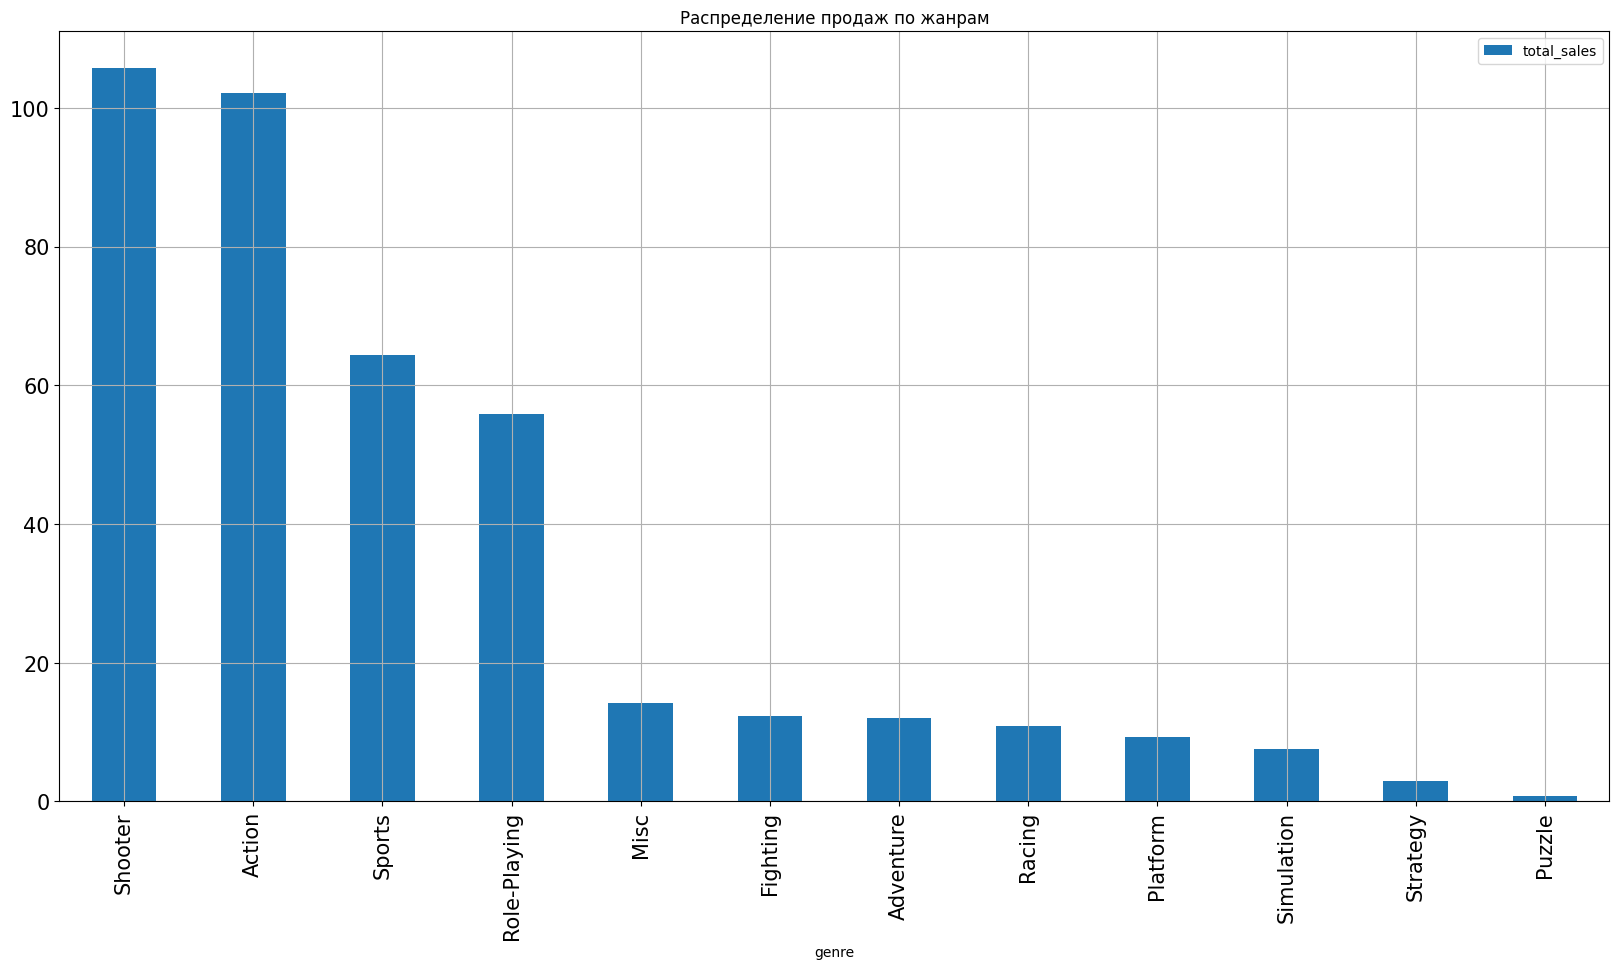

In [91]:
pivot_genre = (
    df.pivot_table(index='genre', values='total_sales', aggfunc='sum')
    .reset_index()
    .sort_values(by='total_sales', ascending=False)
)
pivot_genre.plot(
    x='genre', y='total_sales',
    kind='bar', figsize=(20, 10), grid=True,
    title='Распределение продаж по жанрам', fontsize=15
) 
plt.show()

На первом месте по количеству игр - Action, а вот первые по продажам Shooter, не смотря на то, что они на пятом месте по количеству. **А значит шутеры - лидеры по прибыльности!**. Похожая ситуация и с жанром Sports, его можно назвать вторым по прибыльности. А вот Action и производится и покупается в больших колличествах - у этого жанра окупаемость меньше, не смотря на лидирующие позиции.

## Портрет пользователя для каждого региона

### Популярные платформы в разных регионах

**Ничто не говорит о популярности лучше, чем фактические продажи. Чтобы понять, какие платформы популярны в разных регионах, построим график, показывающий количество продаж по платформам для каждого региона.**

#### Рейтинг платформ для каждого региона

Для красивого и наглядного графика необходимо подготовить красивые и наглядные данные.
Выделим рейтинг платформ для каждого региона:

In [92]:
pivot = df.pivot_table(index='platform', values='na_sales', aggfunc='sum').reset_index()
top_platform_na = (
    pivot.sort_values(by='na_sales', ascending=False)
    .reset_index(drop=True)) # добавил drop=True
display (top_platform_na)

,platform,na_sales
0,PS4,63.860
1,XOne,50.300
2,3DS,10.310
3,WiiU,8.860
4,X360,8.050
5,PS3,5.660
6,PC,3.720
7,PSV,0.540
8,Wii,0.490
9,PSP,0.000


In [93]:
pivot = df.pivot_table(index='platform', values='eu_sales', aggfunc='sum').reset_index()
top_platform_eu = (
    pivot.sort_values(by='eu_sales', ascending=False)
    .reset_index(drop=True))
display (top_platform_eu)

,platform,eu_sales
0,PS4,83.540
1,XOne,28.100
2,PC,9.100
3,3DS,7.390
4,PS3,7.300
5,WiiU,6.490
6,X360,4.210
7,PSV,1.080
8,Wii,0.730
9,PSP,0.000


In [94]:
pivot = df.pivot_table(index='platform', values='jp_sales', aggfunc='sum').reset_index()
top_platform_jp = (
    pivot.sort_values(by='jp_sales', ascending=False)
    .reset_index(drop=True))
display (top_platform_jp)

,platform,jp_sales
0,3DS,23.550
1,PS4,12.050
2,PSV,8.410
3,PS3,4.970
4,WiiU,4.120
5,XOne,0.180
6,PSP,0.120
7,PC,0.000
8,Wii,0.000
9,X360,0.000


Теперь, когда мы знаем популярные платформы в каждом регионе, создадим датасет, в котором перезапишем непопулярные платформы как 'other':

In [95]:
df_top_platforms = df #новый датасет
top_platforms = ['PS4', 'XOne', '3DS', 'WiiU','X360', 'PC', 'PS3', 'PSV'] #список популярных платформ
df_top_platforms.loc[~df_top_platforms['platform'].isin(top_platforms),'platform'] = 'other'
display (df_top_platforms)

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.030,5.860,0.360,2.380,NaN,NaN,NaN,14.630
1,77,FIFA 16,PS4,2015,Sports,1.120,6.120,0.060,1.280,82.000,4.300,E,8.580
2,87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.990,3.490,0.220,1.280,NaN,NaN,NaN,7.980
3,94,FIFA 17,PS4,2016,Sports,0.660,5.750,0.080,1.110,85.000,5.000,E,7.600
4,99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.590,2.110,0.010,0.680,NaN,NaN,NaN,7.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103,16699,The Longest 5 Minutes,PSV,2016,Action,0.000,0.000,0.010,0.000,NaN,NaN,NaN,0.010
1104,16703,Strawberry Nauts,PSV,2016,Adventure,0.000,0.000,0.010,0.000,NaN,NaN,NaN,0.010
1105,16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.000,0.000,0.010,0.000,NaN,NaN,NaN,0.010
1106,16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.000,0.000,0.010,0.000,NaN,NaN,NaN,0.010


### Соотношение популярности платформ по регионам

Все данные готовы, наконец мы можем представить их наглядно:

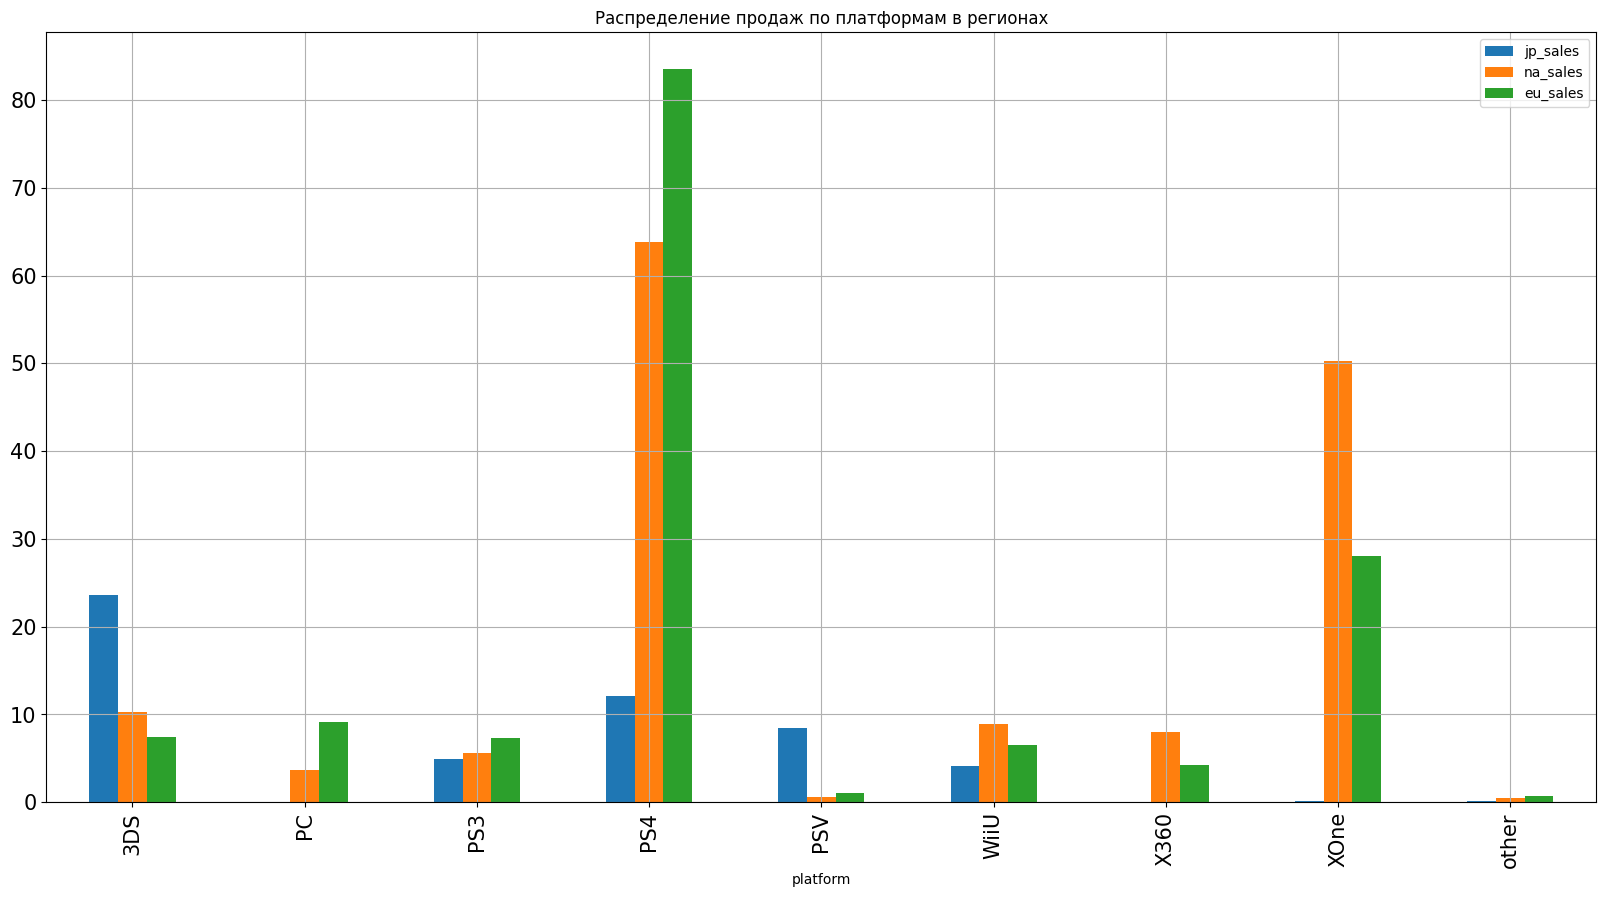

In [96]:
pivot = df_top_platforms.pivot_table(index='platform', values=['jp_sales','eu_sales','na_sales'], aggfunc='sum').reset_index()
pivot.plot(
    x='platform', y=['jp_sales','na_sales','eu_sales'],
    kind='bar', figsize=(20, 10), grid=True,
    title='Распределение продаж по платформам в регионах', fontsize=15
) 
plt.show()

**По графику мы в первую очередь видим, как сильно отличается восточная игровая индустрия от западной. Некоторые консоли, попавшие в топ в Европе и Северной Америке, в Японии представлены в сравнительно небольшом количестве.**

  - Так, например, лидирующий в Северной Америке и Европе PS4 занимает в Японии второе место. И если разница между продажами на эту приставку в Северной Америке и Европе составляет 23,5% в пользу Европы, то разница между Северной Америкой и Европой - 81%
      - Похожая картина и с XOne: второе место в Европе, однако в Северной Америке продается на 44% лучше, а в Японии почти не представлена.

  - Может быть и обратная ситуация - PSV находится на третьем месте по популярности среди японских приставок, тогда как на западе продается на 87% хуже. И это не смотря на то, что продажи в Японии в целом в два раза меньше!
       - Схожа и ситуация с 3DS - лидером Японских продаж. Продажи на эту консоль в Северной Америке и Европе меньше на 56 и 69% соответсвенно. 
 
Даже не смотря на разницу в продажах в целом, заметны существенные различия предочтений в игровой индустрии разных регионов.

## Популярные жанры в разных регионах

### Рейтинг жанров для каждого региона

Поступим с жанрами как и с платформами - вначале выделим рейтинг для каждого региона:

In [97]:
pivot = df.pivot_table(index='genre', values='na_sales', aggfunc='sum').reset_index()
top_genre_na = (
    pivot.sort_values(by='na_sales', ascending=False)
    .reset_index())
display(top_genre_na)

,index,genre,na_sales
0,8,Shooter,48.180
1,0,Action,33.680
2,10,Sports,26.310
3,7,Role-Playing,19.820
4,3,Misc,5.580
5,2,Fighting,5.540
6,1,Adventure,3.840
7,4,Platform,3.780
8,6,Racing,2.820
9,9,Simulation,1.360


In [98]:
pivot = df.pivot_table(index='genre', values='eu_sales', aggfunc='sum').reset_index()
top_genre_eu = (
    pivot.sort_values(by='eu_sales', ascending=False)
    .reset_index())
display (top_genre_eu)

,index,genre,eu_sales
0,8,Shooter,40.280
1,0,Action,34.820
2,10,Sports,27.820
3,7,Role-Playing,17.210
4,6,Racing,6.520
5,1,Adventure,4.670
6,3,Misc,4.260
7,9,Simulation,3.740
8,2,Fighting,3.720
9,4,Platform,3.200


In [99]:
pivot = df.pivot_table(index='genre', values='jp_sales', aggfunc='sum').reset_index()
top_genre_jp = (
    pivot.sort_values(by='jp_sales', ascending=False)
    .reset_index())
display (top_genre_jp) 

,index,genre,jp_sales
0,0,Action,23.050
1,7,Role-Playing,13.410
2,8,Shooter,3.790
3,3,Misc,3.190
4,1,Adventure,2.220
5,9,Simulation,1.930
6,10,Sports,1.650
7,2,Fighting,1.540
8,4,Platform,1.420
9,5,Puzzle,0.520


Теперь, когда мы знаем популярные жанры в каждом регионе, создадим датасет, в котором перезапишем непопулярные жанры как 'other':

In [100]:
df_top_genre = df #новый датасет
top_genres = ['Action', 'Shooter', 'Sports', 'Role-Playing','Racing', 'Misc', 'Adventure'] #список популярных жанров
df_top_genre.loc[~df_top_genre['genre'].isin(top_genres),'genre'] = 'other'
display (df_top_genre)

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.030,5.860,0.360,2.380,NaN,NaN,NaN,14.630
1,77,FIFA 16,PS4,2015,Sports,1.120,6.120,0.060,1.280,82.000,4.300,E,8.580
2,87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.990,3.490,0.220,1.280,NaN,NaN,NaN,7.980
3,94,FIFA 17,PS4,2016,Sports,0.660,5.750,0.080,1.110,85.000,5.000,E,7.600
4,99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.590,2.110,0.010,0.680,NaN,NaN,NaN,7.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103,16699,The Longest 5 Minutes,PSV,2016,Action,0.000,0.000,0.010,0.000,NaN,NaN,NaN,0.010
1104,16703,Strawberry Nauts,PSV,2016,Adventure,0.000,0.000,0.010,0.000,NaN,NaN,NaN,0.010
1105,16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.000,0.000,0.010,0.000,NaN,NaN,NaN,0.010
1106,16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.000,0.000,0.010,0.000,NaN,NaN,NaN,0.010


### Соотношение популярности жанров по регионам

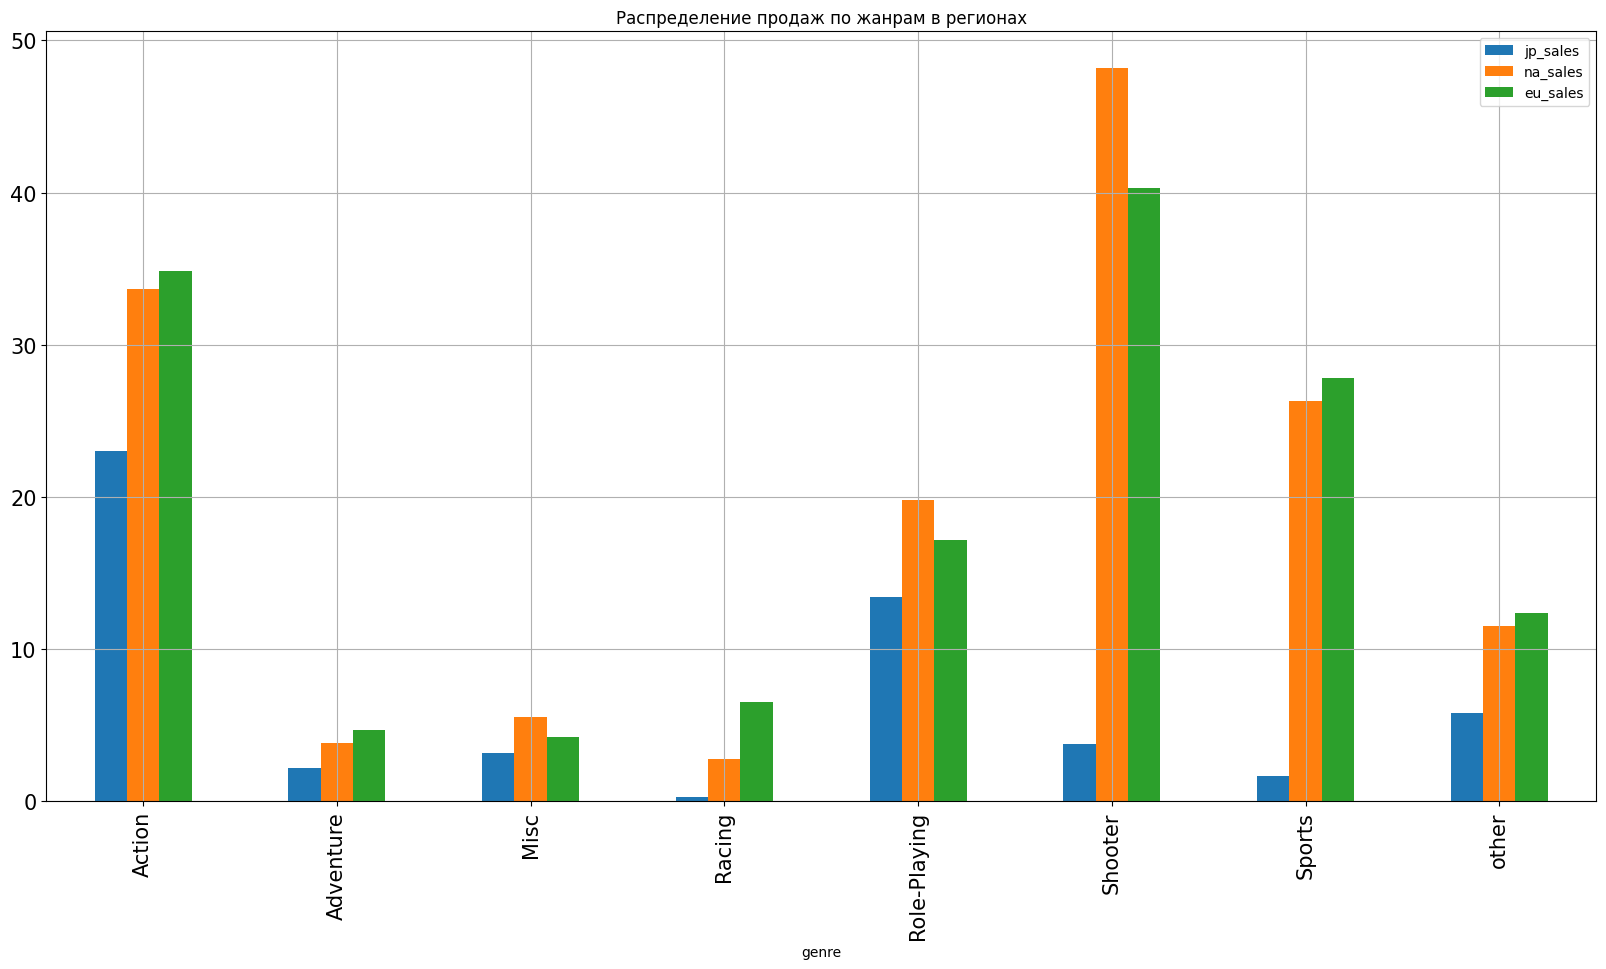

In [101]:
pivot = df_top_genre.pivot_table(index='genre', values=['jp_sales','eu_sales','na_sales'], aggfunc='sum').reset_index()
pivot.plot(
    x='genre', y=['jp_sales','na_sales','eu_sales'],
    kind='bar', figsize=(20, 10), grid=True,
    title='Распределение продаж по жанрам в регионах', fontsize=15
) 
plt.show()

**Ситуация с жанрами по миру немного стабильней, чем с платформами, однако разница в предпочтениях все равно внушительная.**
   - Так, жанр Shooter анимает первое место по популярности как в Северной Америке, так и в Европе. А вот в Японии занимает только третье место, уступая место Action и Role-Playing.
   - В свою очередь, Role-Playing продается в Северной Америке больше, чем в Японии. Однако, занимает в ее рейтинге только 4 место.
   - Рейтинги жанров Европы и Северной Америки различаются всего на один пункт - европейцы предпочитают Racing взамен Misc, который более интересен североамериканцам.
   
**Таким образом, мы наглядно видим, какие существуют тесные культурные связи между Европой и Северной Америкой. И на сколько они далеки от Японии. Ведь предпочтение жанра - это во многом про популярную культуру.**

## Влияние рейтинга ESRB на продажи в регионе

Для того, чтобы понять как влияет рейтинг ESRB на продажи, построим таблицу, в которой будут указаны суммы продаж по каждому рейтингу в каждом регионе.

Для того, чтобы учесть продажи без рейтинга, заменим пропуски в столбце нейтральным значением:

In [102]:
df['rating'] = df['rating'].replace(np.NaN, 'no_rating')

In [103]:
esrb_sales = df.pivot_table(index='rating', values=['jp_sales','eu_sales','na_sales'], aggfunc='sum').reset_index()
display (esrb_sales)

,rating,eu_sales,jp_sales,na_sales
0,E,34.830,5.250,26.590
1,E10+,11.540,3.270,17.870
2,M,45.540,4.290,47.030
3,T,20.320,7.700,22.860
4,no_rating,35.710,32.890,37.440


Построим график по таблице:

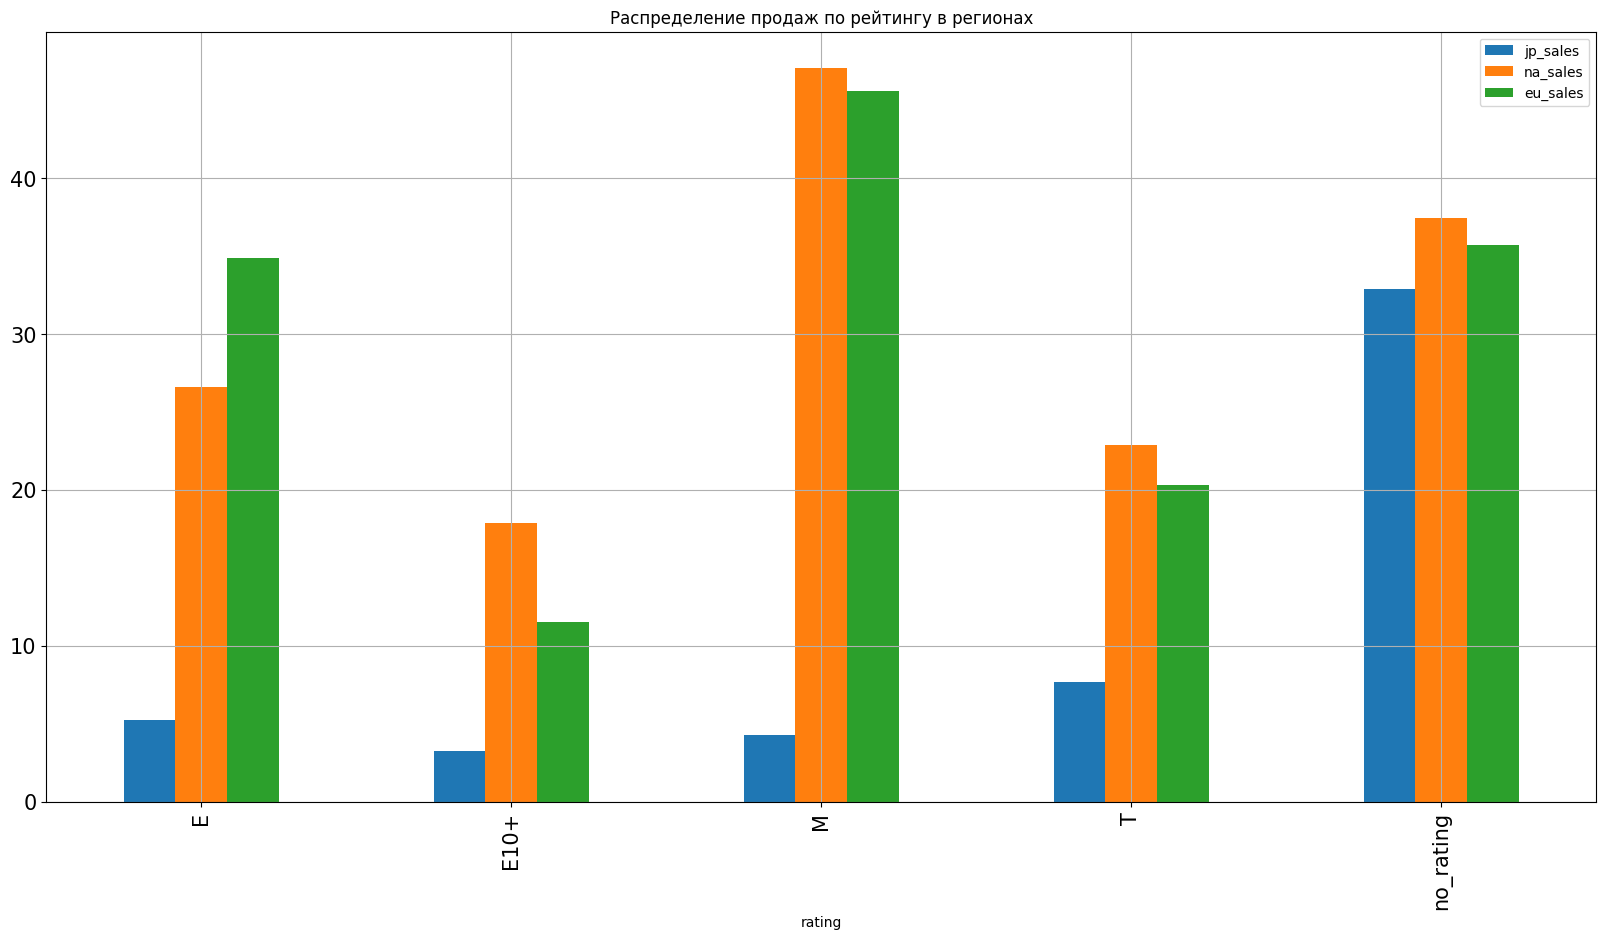

In [104]:
esrb_sales.plot(
    x='rating', y=['jp_sales','na_sales','eu_sales'],
    kind='bar', figsize=(20, 10), grid=True,
    title='Распределение продаж по рейтингу в регионах', fontsize=15
) 
plt.show()

Большая часть столбцов на графике распределены достаточно привычно и по соотвествию с количеством продаж - лидирует Северная Америка, далее Европа и Япония. Но есть и особенности:
   - большая часть игр в Японии не имеет рейтинга. Это связано с тем, что в Японии дейтсвует своя система рейтингов - CERO.
   - Игры с рейтингом ЕС представленны в небольшом количестве и только в Северной Америке. Это игры, которые, как правило, разрабатываются специально для детей. Возможно, это связано с общей популярностью игр - в Северной Америке играют все (и даже маленькие дети).
   - В совсем небольшом количестве в Европе продались игры, ожидающие рейтинга. Возможно, это связано с тем, что много игр разрабатывается именно там. 

# Проверка гипотез

## Пользовательские рейтинги платформ Xbox One и PC

Первое утверждение, которое нам предстоит проверить звучит как "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые". На его основе мы выдвигаем нулевую гипотезу **"Средние пользовательские рейтинги платформ Xbox One и PC равны между собой"**. Альтезнативная же гипотеза, в случае, если данные будут протироваречить нулевой гипотезе, будет звучать как **"Средние пользовательские рейтинги платформ Xbox One и PC не равны между собой"**. В дальнейшем исследовани мы сможем либо отвергнуть, либо не отвергнуть нулевую гипотезу, так как никакие экспериментально полученные данные никогда не подтвердят какую-либо гипотезу.

Проверять ее мы будем с помощью t-теста, через равенство средних двух генеральных совокупностей, по взятым по ним выборкам, так как у нас есть два независимые друг от друга объема данных.

Приступим к проверке:

**Н0: "Средние пользовательские рейтинги платформ Xbox One и PC равны между собой"**

**Н1: "Средние пользовательские рейтинги платформ Xbox One и PC не равны между собой"**

In [105]:
x_one = df[(df['platform']=='XOne')&(df['user_score']>0)]['user_score']
pc = df[(df['platform']=='PC')&(df['user_score']>0)]['user_score']

alpha = .05

results = st.ttest_ind(
    x_one, pc)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.2778542084733835
Не получилось отвергнуть нулевую гипотезу


**Нулевая гипотеза не отвегнута, а значит средние пользовательские рейтинги платформ Xbox One и PC не имеют статистически значимых отличий.**

## Пользовательские рейтинги жанров Action и Sports 

Второе утверждение, которое нам предстоит проверить: "Средние пользовательские рейтинги жанров Action и Sports разные". По аналогии с предыдущей проверкой, выдвигаем нулевую гипотезу: **"Средние пользовательские рейтинги жанров Action и Sports равны"**, и альтернативную **"Средние пользовательские рейтинги жанров Action и Sports не равны"**.

Проверку будем проводить с помощью того же t-теста на основе среднего из выборок двух совокупностей.

**Н0: "Средние пользовательские рейтинги жанров Action и Sports равны"**

**Н1: "Средние пользовательские рейтинги жанров Action и Sports не равны"**

In [106]:
action = df[(df['genre']=='Action')&(df['user_score']>0)]['user_score']
sports = df[(df['genre']=='Sports')&(df['user_score']>0)]['user_score']

alpha = .05

results = st.ttest_ind(
    action, sports)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.0012846807938657e-13
Отвергаем нулевую гипотезу


**Нулевая гипотеза отвергнута, а значит средние пользовательские рейтинги жанров Action и Sports имеют статистически значимые отличия.**

# Вывод

## Путь исследования

**В этом исследовании рынка игровой индустрии мы прошли через несколько основных этапов. Каждый из них дал нам пищу для размышлений и основу для прогнозов. Кратко пройдемся по каждому их них:**

*Первый этап*

***Ознакомление и предобработка***
   - проверка на дубликаты
   - переимонование столбцов
   - обработка пропусков
   - изменение типов данных
   - вычисление и добавление дополнительных данных
 
*Второй этап*

***Анализ данных***

Стоит отметить, что в начале этого этапа были отсечены данные за 1980 - 1994, так как они совсем не актуальны для нашего исследования.

**По платформам:**

   - средняя продолжительность активной жизни платформы - 5 лет
Основываясь на этом, для дальнейшего прогноза на 2017 год были отброшены данные до 2014 года включительно
   - потенциально прибыльные платформы на 2017 год - PS4 и XboxOne
   - на сегодняшний день самые популярные консоли в Северной Америке и Европе - PS4 и XOne, а в Японии - 3DS и PS4
   
**По продажам:**
   - в среднем, на популярную платформу продается 100-200 тысяч копий каждой игры
   - на продажи не влияют оценки покупателей, однако совсем немного влияют оценки критиков
   
**По жанрам:**
   - больше всего игр на рынке представлены в жанре action
   - самый окупаемый жанр - shooter
   - shooter заметно набрали популярность в Северной Америке и Европе
   - в Японии самый популярный жанр - action

## Рекомендации на 2017 год

Исходя из полученных данных, в 2017 можно ожидать:
   - дальнейшего роста спроса на игры на PS4 и XboxOne
   - не смотря на количество консолей, PC не теряет актуальности для пользователей, игры на него так же будут актуальны и востребованы
   - актуальные игры для Северной Америки и Европы - активные. Ориентированно на них, следует обратить внимание на жанры shooter, action, sport
   - для Японии более актуальные сюжетные игры - action, role-playing, misc
   - в Японии большой спрос на портативные консоли, это следует учитывать в рекламе и распределении топов для страны